<a href="https://colab.research.google.com/github/iclalaca/diabetes-ml-analysis/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


Library imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

EDA

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All variables in the data set are numerical

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the dataset, some features can logically have a value of zero, while others cannot due to medical reasons.

# Features that can be zero:
Pregnancies, Outcome

# Features that cannot be zero:
Glucose, BloodPressure, SkinThickness, Insulin, BMI


Values that are zero in the medically impossible features (e.g., Glucose or BloodPressure) should be treated as missing data. These values must be properly handled—either by imputation (e.g., replacing with the mean, median, or using more advanced methods) or by excluding the corresponding records from the dataset.

Additionally, outliers can also be observed in the dataset, which may affect the accuracy and reliability of any predictive models or statistical analyses.

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [13]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627

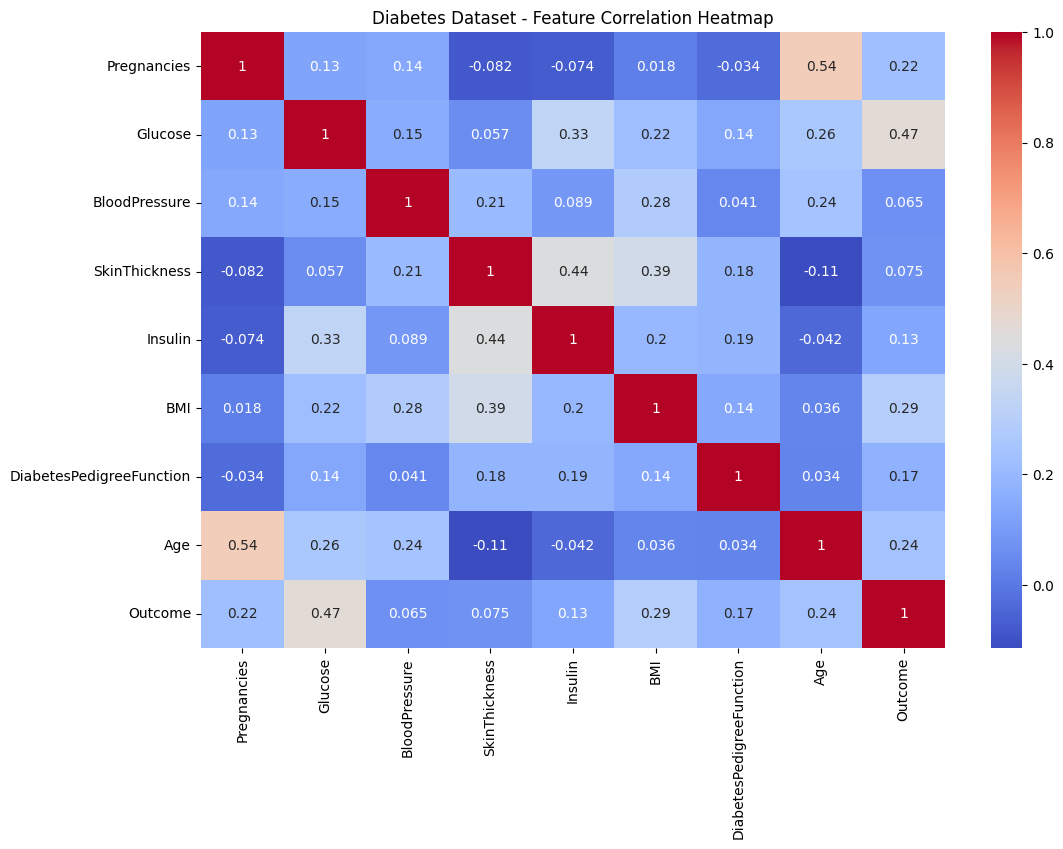

In [14]:
# Calculate the correlation matrix between all numerical variables
correlation_matrix = df.corr()

# Draw the correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Diabetes Dataset - Feature Correlation Heatmap')
plt.show()

There is no shortage of data, but some variables may have an outlier. Especially:

Insulin

BMI

SkinThickness

Let's look at these by drawing boxplot:

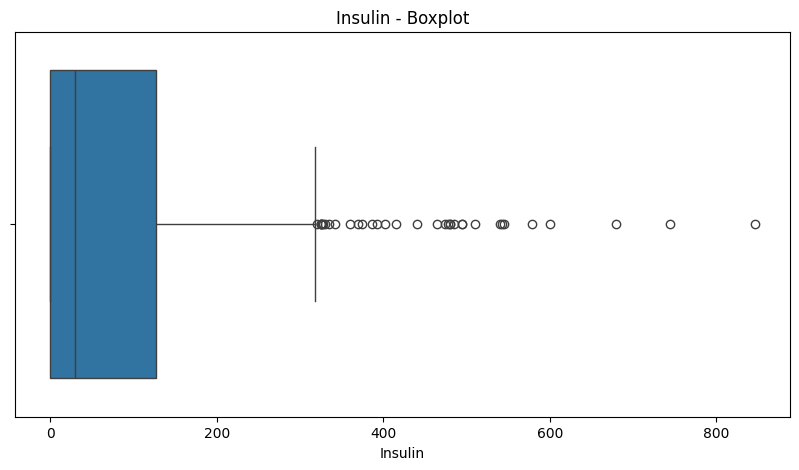

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Insulin"])
plt.title("Insulin - Boxplot")
plt.show()

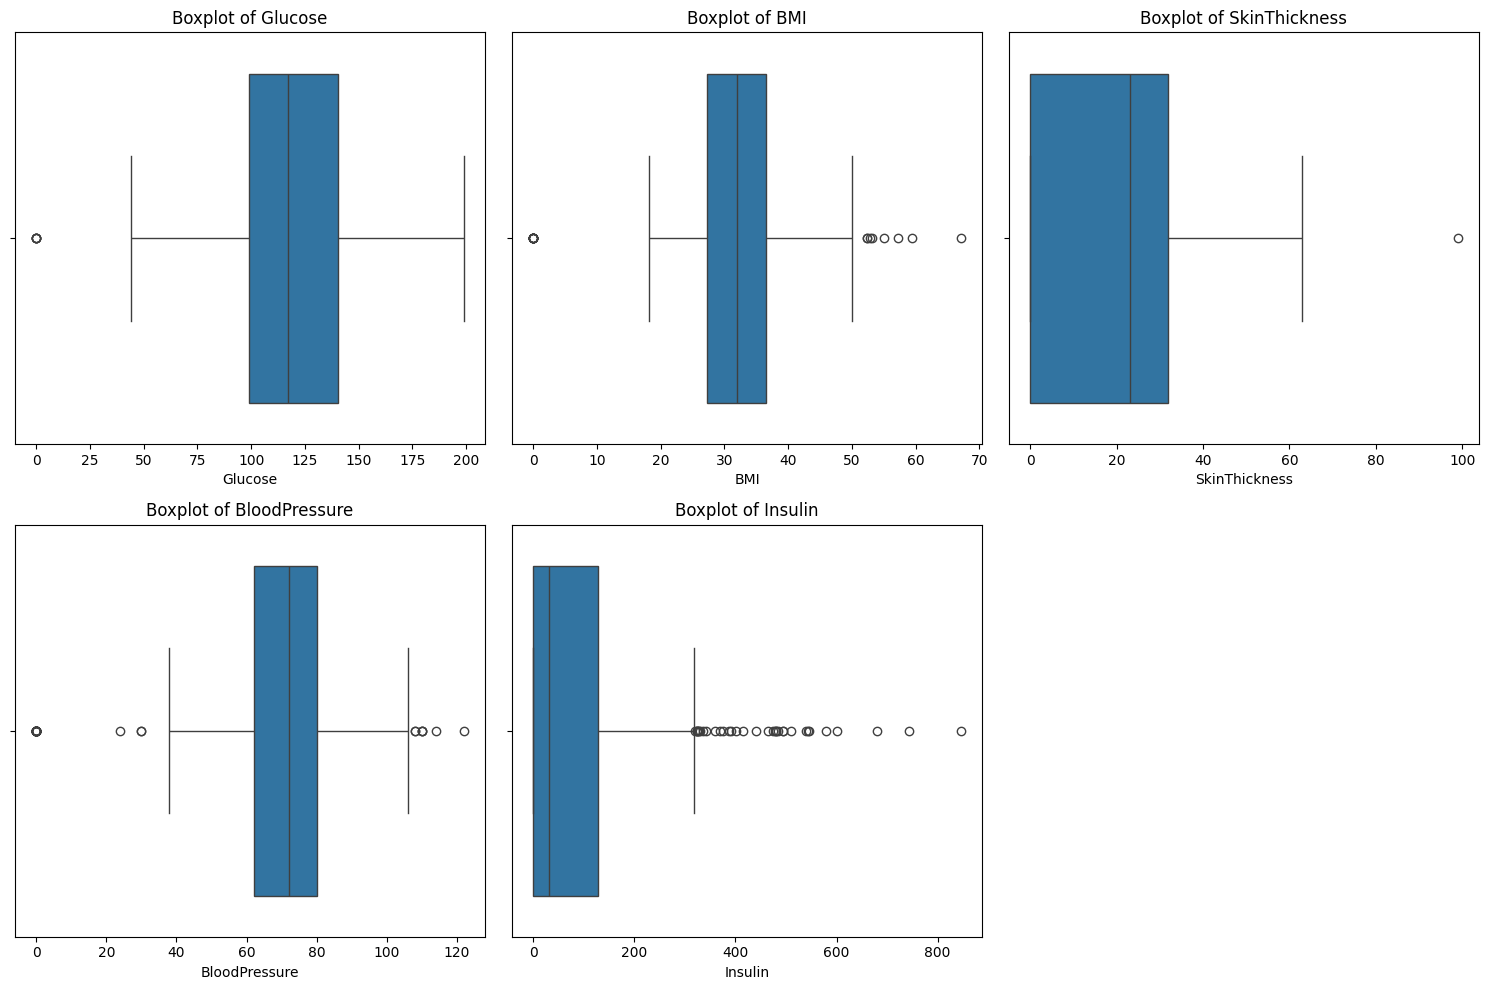

In [16]:
features = ['Glucose', 'BMI', 'SkinThickness', 'BloodPressure', 'Insulin']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Outliers were detected in all key features and capped within the acceptable range using the IQR method to reduce their impact without losing data:

In [17]:
def cap_outliers_iqr(df, column):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Pull the values below the lower limit to the lower limit
    df[col]=df[col].apply(lambda x: lower_bound if x < lower_bound else x)

    # Pull the values above the upper limit to the upper limit
    df[col]=df[col].apply(lambda x: upper_bound if x > upper_bound else x)
  return df

columns = ['Glucose', 'BMI', 'SkinThickness', 'BloodPressure', 'Insulin']
df_capped = cap_outliers_iqr(df.copy(), features)

In [19]:
# Target column: Outcome (have diabetes or not)
X=df.drop(columns=["Outcome"])
y=df["Outcome"]

Logistic Regression model + Cross-Validation:

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the model
log_model=LogisticRegression(max_iter=1000)

# Perform cross-validation
log_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Logistic Regression CV scores:", log_scores)
print("Logistic Regression Mean Accuracy:", log_scores.mean())

Logistic Regression CV scores: [0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Logistic Regression Mean Accuracy: 0.7721925133689839


Random Forest model + Cross-Validation:

In [21]:
rf_model=RandomForestClassifier(random_state=42)

# Perform cross-validation
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Random Forest CV scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())

Random Forest CV scores: [0.74025974 0.74675325 0.75974026 0.83660131 0.75163399]
Random Forest Mean Accuracy: 0.7669977081741788


Hyperparameter Tuning:

In [22]:
rf= RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.774755962991257


In [23]:
log_reg=LogisticRegression(max_iter=1000)

param_grid={'C':[0.001,0.01,0.1,1,10,100,1000],
            'penalty':['l2'],
            'solver':['lbfgs'],
            }

grid_search=GridSearchCV(estimator=log_reg, param_grid=param_grid ,cv=5, scoring='accuracy')
grid_search.fit(X,y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.7721925133689839


To compare the accuracy rates of the two models, you can look at the mean cross-validation scores and the best scores obtained after hyperparameter tuning.

**1. Compare Cross-Validation Scores:**

You've already printed the mean cross-validation accuracy for both models:

*   **Logistic Regression Mean Accuracy:** `0.7721925133689839`
*   **Random Forest Mean Accuracy:** `0.7669977081741788`

Based on these initial cross-validation scores, the Logistic Regression model performed slightly better on average across the 5 folds.

**2. Compare Best Scores after Hyperparameter Tuning:**

You've also performed hyperparameter tuning using `GridSearchCV` and printed the best scores:

*   **Random Forest Best Score:** `0.774755962991257`
*   **Logistic Regression Best CV Score:** `0.7721925133689839`

After tuning, the Random Forest model with the best parameters (`'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50`) achieved a slightly higher accuracy than the best Logistic Regression model.

**Conclusion:**

While the initial cross-validation showed a slight edge for Logistic Regression, the hyperparameter tuning results indicate that the Random Forest model, when optimized, can achieve a slightly higher accuracy on this dataset.

It's important to note that these differences are relatively small. The choice between the models might also depend on other factors like interpretability, training time, and potential overfitting.

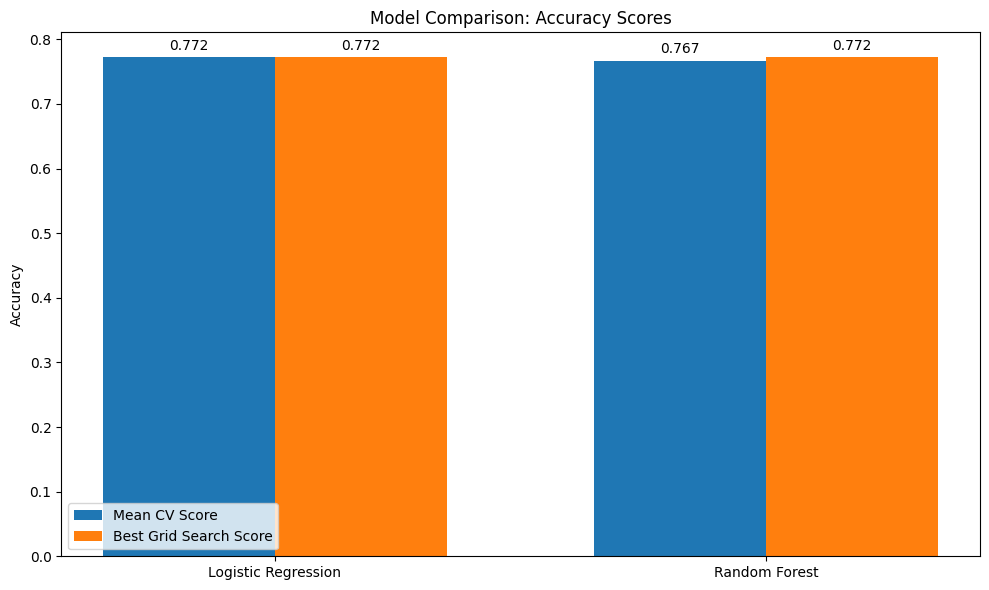

In [24]:
# Data for plotting
models = ['Logistic Regression', 'Random Forest']
mean_cv_scores = [log_scores.mean(), rf_scores.mean()]
best_scores = [grid_search.best_score_ , grid_search.best_score_] # Assuming grid_search is the last performed grid search

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mean_cv_scores, width, label='Mean CV Score')
rects2 = ax.bar(x + width/2, best_scores, width, label='Best Grid Search Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Accuracy Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()